In [9]:
%run ./'01 load.ipynb'

In [2]:
len_predictions = 15
death_rate = 0.04014563012 # global as of 2020-03-18
death_rate = 0.008 # luca
start_date = '2020-02-20'
len_before_start = len(df[(df['country'] == 'Germany') & (df['date'] < start_date)])
len_after_start = len(df[(df['country'] == 'Germany') & (df['date'] >= start_date)])

In [31]:
germany = df[df['country'] == 'Germany']
# germany = df.groupby('date').sum().reset_index() # world
dates_new = pd.date_range(germany['date'].iloc[-1], periods=len_predictions)
df_new = pd.DataFrame(dates_new[1:], columns=['date'])
germany = germany.append(df_new, ignore_index=True)
germany['date_string'] = germany['date'].dt.strftime('%d. %b')

In [32]:
# prepare machine learning magic
y = germany.iloc[len_before_start:]['confirmed'].dropna()
x = list(range(len(y)))
# machine learning magic
from scipy.optimize import curve_fit
def func(x, a, b, c, d):
    return c**x + d
popt, pcov = curve_fit(func, x, y)

/miniconda/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [33]:
# get x values from predictor
predict = []
for i in range(len_after_start+len_predictions):
    predict.append(func(i, *popt))
germany = germany.join(pd.DataFrame(enumerate(predict, len_before_start), columns=['id', 'predict']).set_index('id'))    

In [34]:
# predict deaths based on prediction of cases and death rate (see top)
germany['predict_deaths'] = germany['predict'] * death_rate

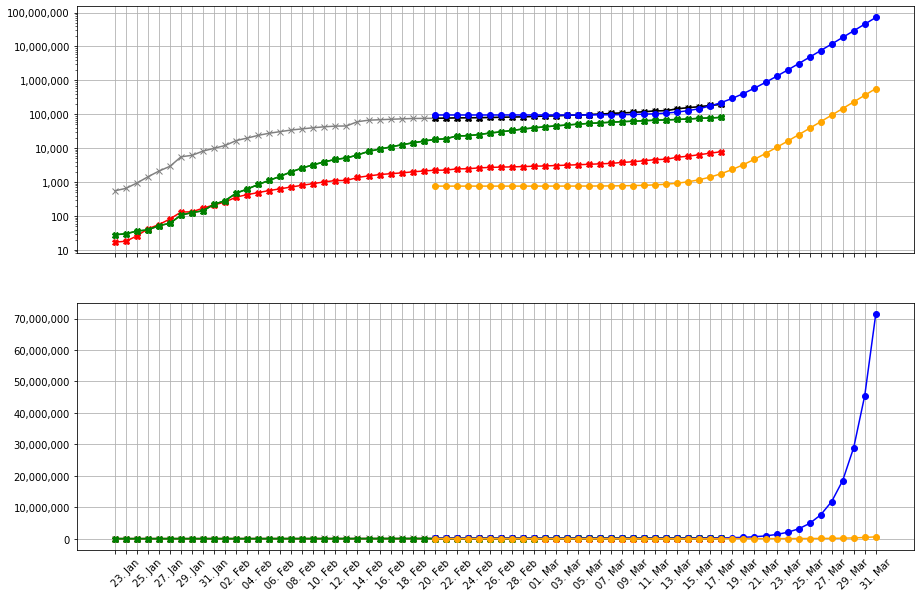

In [35]:
import matplotlib.pyplot as plt
import matplotlib.ticker
format_y = matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
x = list(germany['date_string'])
%matplotlib inline
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,1,1)
ax1.grid(True)
ax1.plot(germany['date_string'], germany['confirmed'], marker='x', color='gray')
ax1.plot(germany['date_string'], germany['deaths'], marker='X', color='red')
ax1.plot(germany['date_string'], germany['recovered'], marker='X', color='green')
ax1.plot(germany.iloc[len_before_start:]['date_string'], germany.iloc[len_before_start:]['confirmed'], marker='X', color='black')
ax1.plot(germany['date_string'], germany['recovered'], marker='X', color='green')
ax1.plot(germany['date_string'], germany['predict'], marker='o', color='blue')
ax1.plot(germany['date_string'], germany['predict_deaths'], marker='o', color='orange')
ax1.set_xticklabels([])
ax1.set_yscale('log')
ax1.yaxis.set_major_formatter(format_y)
ax2 = fig.add_subplot(2,1,2)
ax2.grid(True)
ax2.plot(germany['date_string'], germany['confirmed'], marker='x', color='gray')
ax2.plot(germany['date_string'], germany['deaths'], marker='X', color='red')
ax2.plot(germany['date_string'], germany['recovered'], marker='X', color='green')
ax2.plot(germany.iloc[len_before_start:]['date_string'], germany.iloc[len_before_start:]['confirmed'], marker='X', color='black')
ax2.plot(germany['date_string'], germany['recovered'], marker='X', color='green')
ax2.plot(germany['date_string'], germany['predict'], marker='o', color='blue')
ax2.plot(germany['date_string'], germany['predict_deaths'], marker='o', color='orange')
ax2.set_xticklabels(labels=germany['date_string'], rotation=45)
ax2.yaxis.set_major_formatter(format_y)
for label in ax2.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

In [37]:
germany.iloc[-len_predictions:]

,date,confirmed,deaths,recovered,date_string,predict,predict_deaths
55,2020-03-17,"197,146","7,905","80,840",17. Mar,"222,464","1,780"
56,2020-03-18,nan,nan,nan,18. Mar,"295,200","2,362"
57,2020-03-19,nan,nan,nan,19. Mar,"409,510","3,276"
58,2020-03-20,nan,nan,nan,20. Mar,"589,155","4,713"
59,2020-03-21,nan,nan,nan,21. Mar,"871,480","6,972"
60,2020-03-22,nan,nan,nan,22. Mar,"1,315,175","10,521"
61,2020-03-23,nan,nan,nan,23. Mar,"2,012,471","16,100"
62,2020-03-24,nan,nan,nan,24. Mar,"3,108,321","24,867"
63,2020-03-25,nan,nan,nan,25. Mar,"4,830,527","38,644"
64,2020-03-26,nan,nan,nan,26. Mar,"7,537,095","60,297"
